In [1]:
import pandas as pd
import numpy as np

from importlib.machinery import SourceFileLoader
metrics = SourceFileLoader('dcr_nndr', '../metrics/privacy_metrics/dcr_nndr.py').load_module()

## AIDS

In [2]:
original = pd.read_csv('../datasets/AIDS/aids_original_data.csv', sep=';')
original = original.drop(["pidnum"], axis=1)
avatar = pd.read_csv('../datasets/AIDS/aids_avatarized_base_k20_nf5.csv')
synthpop = pd.read_csv('../datasets/AIDS/aids_synthpop_base.csv')
ctgan = pd.read_csv('../datasets/AIDS/aids_CTGAN_base_2.csv')

# Replace missing for metric computation
original = original.fillna(0)
avatar = avatar.fillna(0)
synthpop = synthpop.fillna(0)
ctgan = ctgan.fillna(0)

# Get correct data types
categorical_val, continuous_val = metrics.get_categorical_continuous(original)
original[categorical_val] = original[categorical_val].astype("category")
avatar[categorical_val] = avatar[categorical_val].astype("category")
synthpop[categorical_val] = synthpop[categorical_val].astype("category")
ctgan[categorical_val] = ctgan[categorical_val].astype("category")

# Add id column for metric computation
original['id'] = original.index
avatar['id'] = avatar.index
synthpop['id'] = synthpop.index
ctgan['id'] = ctgan.index

# Compute DCR and NNDR metrics
target = metrics.prepare_common_data_format(original,cat_columns= categorical_val,num_columns=continuous_val)
synthetic_avatar = metrics.prepare_common_data_format(avatar,cat_columns= categorical_val,num_columns=continuous_val)
synthetic_synthpop = metrics.prepare_common_data_format(synthpop,cat_columns= categorical_val,num_columns=continuous_val)
synthetic_ctgan = metrics.prepare_common_data_format(ctgan,cat_columns= categorical_val,num_columns=continuous_val)


privacy_avatar = metrics.compare(target, synthetic_avatar, metrics_to_return="privacy-tests")
privacy_synthpop = metrics.compare(target, synthetic_synthpop, metrics_to_return="privacy-tests")
privacy_ctgan = metrics.compare(target, synthetic_ctgan, metrics_to_return="privacy-tests")

aids_privacy_results = pd.concat([privacy_avatar, privacy_synthpop, privacy_ctgan])
aids_privacy_results
x = np.array(["Avatar", "Synthpop", "CT-GAN"])
type = np.repeat(x, [len(privacy_avatar), len(privacy_synthpop), len(privacy_ctgan)], axis=0)
aids_privacy_results['type'] = type

aids_privacy_results.to_csv('/Users/morgan/Tech/avatar-paper/datasets/results_df/AIDS_DCR_NNDR_comparison_results.csv',index=False)

../metrics/privacy_metrics/dcr_nndr.py:295: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tgt_data_p = tgt_data_p.reset_index().drop("id", 1)
../metrics/privacy_metrics/dcr_nndr.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  syn_data_p = syn_data_p.reset_index().drop("id", 1)
../metrics/privacy_metrics/dcr_nndr.py:295: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tgt_data_p = tgt_data_p.reset_index().drop("id", 1)
../metrics/privacy_metrics/dcr_nndr.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  syn_data_p = syn_data_p.reset_index().drop("id", 1)
../metrics/privacy_metrics/dcr_nndr.py:295: FutureWarning: In a future version o

## WBCD

In [3]:
original = pd.read_csv('../datasets/WBCD/breast_cancer_wisconsin.csv')
original = original.drop(["Sample_code_number"], axis=1)
avatar = pd.read_csv('../datasets/WBCD/breast_cancer_wisconsin_avatarized_k20.csv')
synthpop = pd.read_csv('../datasets/WBCD/wbcd_synthpop_base.csv')
ctgan = pd.read_csv('../datasets/WBCD/wbcd_CTGAN_base_2.csv')

# Get correct data types
#categorical_val, continuous_val = metrics.get_categorical_continuous(original)
categorical_val = ['Class']
continuous_val = ['Clump_Thickness', 'Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']
original[categorical_val] = original[categorical_val].astype("category")
avatar[categorical_val] = avatar[categorical_val].astype("category")
synthpop[categorical_val] = synthpop[categorical_val].astype("category")
ctgan[categorical_val] = ctgan[categorical_val].astype("category")

# Add id column for metric computation
original['id'] = original.index
avatar['id'] = avatar.index
synthpop['id'] = synthpop.index
ctgan['id'] = ctgan.index

# Compute DCR and NNDR metrics
target = metrics.prepare_common_data_format(original,cat_columns= categorical_val,num_columns=continuous_val)
synthetic_avatar = metrics.prepare_common_data_format(avatar,cat_columns= categorical_val,num_columns=continuous_val)
synthetic_synthpop = metrics.prepare_common_data_format(synthpop,cat_columns= categorical_val,num_columns=continuous_val)
synthetic_ctgan = metrics.prepare_common_data_format(ctgan,cat_columns= categorical_val,num_columns=continuous_val)


privacy_avatar = metrics.compare(target, synthetic_avatar, metrics_to_return="privacy-tests")
privacy_synthpop = metrics.compare(target, synthetic_synthpop, metrics_to_return="privacy-tests")
privacy_ctgan = metrics.compare(target, synthetic_ctgan, metrics_to_return="privacy-tests")

wbcd_privacy_results = pd.concat([privacy_avatar, privacy_synthpop, privacy_ctgan])
wbcd_privacy_results
x = np.array(["Avatar", "Synthpop", "CT-GAN"])
type = np.repeat(x, [len(privacy_avatar), len(privacy_synthpop), len(privacy_ctgan)], axis=0)
wbcd_privacy_results['type'] = type

wbcd_privacy_results.to_csv('/Users/morgan/Tech/avatar-paper/datasets/results_df/WBCD_DCR_NNDR_comparison_results.csv',index=False)

../metrics/privacy_metrics/dcr_nndr.py:295: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tgt_data_p = tgt_data_p.reset_index().drop("id", 1)
../metrics/privacy_metrics/dcr_nndr.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  syn_data_p = syn_data_p.reset_index().drop("id", 1)
../metrics/privacy_metrics/dcr_nndr.py:295: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tgt_data_p = tgt_data_p.reset_index().drop("id", 1)
../metrics/privacy_metrics/dcr_nndr.py:296: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  syn_data_p = syn_data_p.reset_index().drop("id", 1)
../metrics/privacy_metrics/dcr_nndr.py:295: FutureWarning: In a future version o

<AxesSubplot:xlabel='NNDR', ylabel='type'>

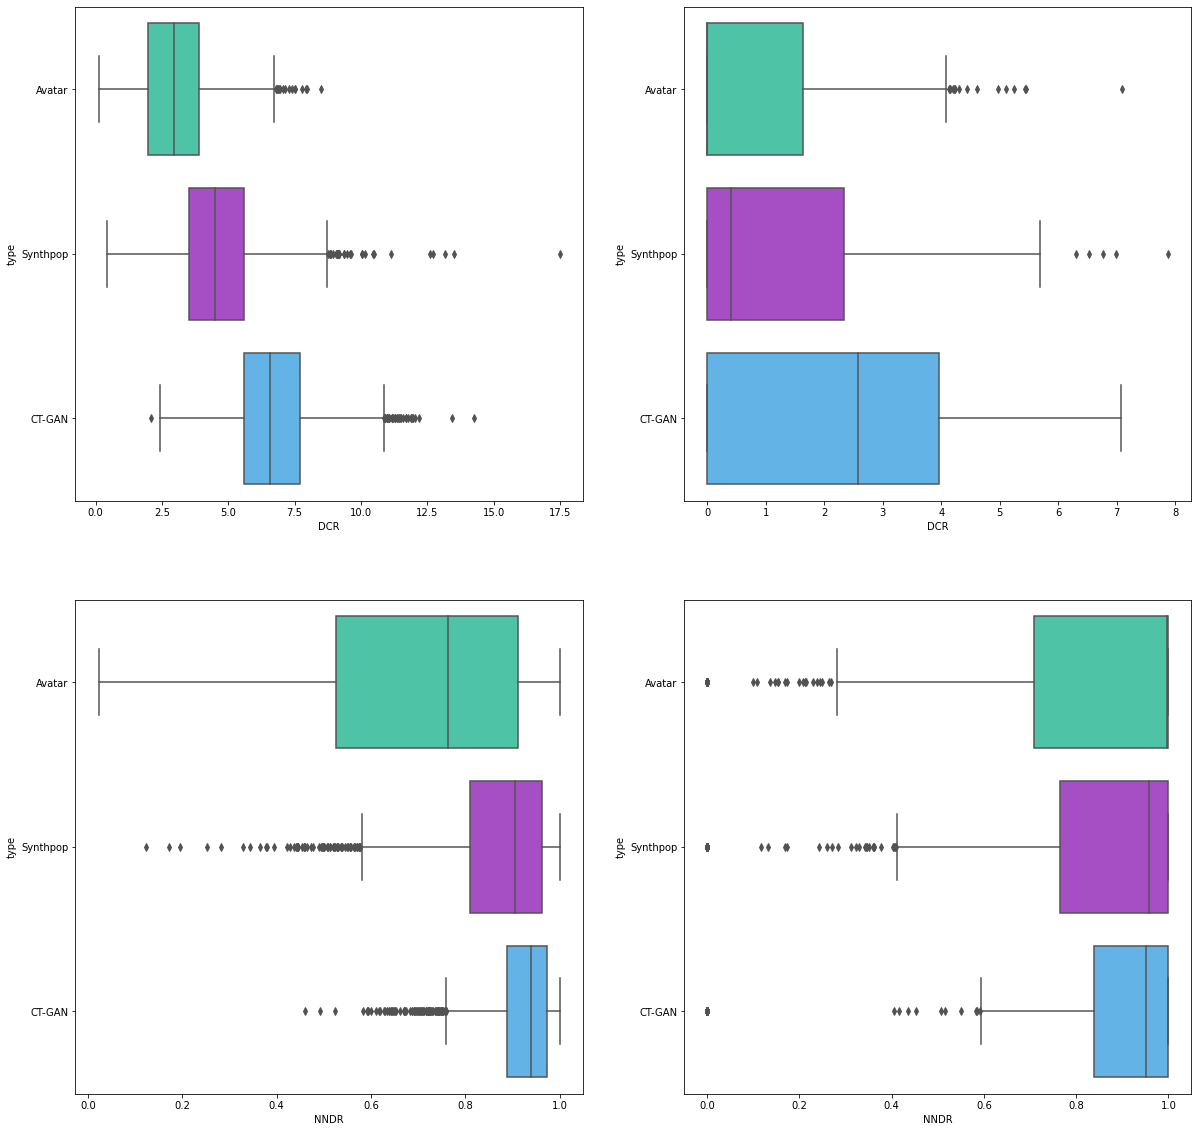

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20,20))
color_dict = {'Avatar' : '#3bd6b0', 'Synthpop' : '#b03bd6', 'CT-GAN' : '#4db7fd'}

sns.boxplot(data=aids_privacy_results, x="DCR", y="type", ax = axes[0,0], palette = color_dict)
sns.boxplot(data=wbcd_privacy_results, x="DCR", y="type", ax = axes[0,1], palette = color_dict)
sns.boxplot(data=aids_privacy_results, x="NNDR", y="type", ax = axes[1,0], palette = color_dict)
sns.boxplot(data=wbcd_privacy_results, x="NNDR", y="type", ax = axes[1,1], palette = color_dict)
